In [1]:
import os
import sys
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn import decomposition
from matplotlib.backends.backend_pdf import PdfPages
import importlib
from sklearn.cluster import KMeans, AffinityPropagation, SpectralClustering

sys.path.append('../catrace/')
import catrace
from catrace import dataio
import catrace.process_time_trace as ptt
import catrace.plot_trace as pltr
import catrace.pattern_correlation as pcr
import catrace.manifold_embed as emb
import catrace.exp_collection as ecl
from catrace.frame_time import convert_sec_to_frame
from catrace.trace_dataframe import concatenate_planes
importlib.reload(catrace.plot_trace)
importlib.reload(ecl)
importlib.reload(ptt)
import catrace.frame_time as frame_time


In [2]:
exp_list = [( '2021-02-05-DpOBEM-JH9','phe-arg'),
            ('2021-03-18-DpOBEM-JH10','phe-arg'),
            ('2021-03-19-DpOBEM-JH10','phe-arg'),
            ('2021-04-02-DpOBEM-JH11','phe-arg'),
            ('2021-04-03-DpOBEM-JH11','phe-arg'),
            ('2021-05-01-DpOBEM-JH13','phe-arg'),
            ('2021-05-22-DpOBEM-JH14','phe-arg'),
            ('2021-07-15-DpOBEM-N2'  ,'naive'),
            ('2021-07-16-DpOBEM-N3' ,'naive'),
            ('2021-07-30-DpOBEM-JH17','arg-phe'),
            ('2021-07-31-DpOBEM-JH17','arg-phe'),
            ('2021-09-02-DpOBEM-JH18','arg-phe'),
            ('2021-09-03-DpOBEM-JH18','arg-phe'),
            ('2021-09-04-DpOBEM-JH18','arg-phe'),
            ('2021-09-15-DpOBEM-JH20','phe-arg'),
            ('2021-09-17-DpOBEM-JH20','phe-arg'),
            ('2021-09-18-DpOBEM-JH20','phe-arg'),
            ('2021-09-29-DpOBEM-JH21','arg-phe'),
            ('2021-10-01-DpOBEM-JH21','arg-phe'),
            ('2021-10-02-DpOBEM-JH21','arg-phe'),
            ('2021-11-10-DpOBEM-JH23','phe-trp'),
            ('2021-11-14-DpOBEM-JH23','phe-trp'),
            ('2021-11-24-DpOBEM-JH24','phe-trp'),
            ('2021-11-27-DpOBEM-JH24','phe-trp'),
            ('2021-11-26-DpOBEM-JH24','phe-trp'),
            ('2021-12-10-DpOBEM-N4','naive'),
            ('2021-12-31-DpOBEM-N7','naive')]
region_list = ['Dp', 'OB']
frame_rate = 30/4
#num_trial = 3
exp_info = dict(num_trial=3)
odor_list = ['phe', 'trp', 'arg', 'tdca', 'tca', 'gca', 'acsf', 'spont']
#plane_nb_list = np.array([1,2,3,4]) - 1
data_root_dir = '/media/hubo/WD_BoHu/Ca_imaging/results/'
dfovf_dict = dict()
load_data = False
if load_data:
    for region in region_list:
        dfovf_dict[region] = dict()
        for exp in exp_list:
            exp_name = exp[0]
            print(exp_name, region)
            dfovf_dict[region][exp_name] = ecl.load_dfovf(data_root_dir, exp_name, region)

In [3]:
data_root_dir = '/media/hubo/WD_BoHu/Ca_imaging/results/'
dfovf_dict = dict()
for region in region_list:
    dfovf_dict[region] = dict()
    for exp in exp_list:
        exp_name = exp[0]
        print(exp_name, region)
        dfovf_dict[region][exp_name] = ecl.load_dfovf(data_root_dir,
                                                  exp_name, region)

2021-02-05-DpOBEM-JH9 Dp
2021-03-18-DpOBEM-JH10 Dp
2021-03-19-DpOBEM-JH10 Dp
2021-04-02-DpOBEM-JH11 Dp
2021-04-03-DpOBEM-JH11 Dp
2021-05-01-DpOBEM-JH13 Dp
2021-05-22-DpOBEM-JH14 Dp
2021-07-15-DpOBEM-N2 Dp
2021-07-16-DpOBEM-N3 Dp
2021-07-30-DpOBEM-JH17 Dp
2021-07-31-DpOBEM-JH17 Dp
2021-09-02-DpOBEM-JH18 Dp
2021-09-03-DpOBEM-JH18 Dp
2021-09-04-DpOBEM-JH18 Dp
2021-09-15-DpOBEM-JH20 Dp
2021-09-17-DpOBEM-JH20 Dp
2021-09-18-DpOBEM-JH20 Dp
2021-09-29-DpOBEM-JH21 Dp
2021-10-01-DpOBEM-JH21 Dp
2021-10-02-DpOBEM-JH21 Dp
2021-11-10-DpOBEM-JH23 Dp
2021-11-14-DpOBEM-JH23 Dp
2021-11-24-DpOBEM-JH24 Dp
2021-11-27-DpOBEM-JH24 Dp
2021-11-26-DpOBEM-JH24 Dp
2021-12-10-DpOBEM-N4 Dp
2021-12-31-DpOBEM-N7 Dp
2021-02-05-DpOBEM-JH9 OB
2021-03-18-DpOBEM-JH10 OB
2021-03-19-DpOBEM-JH10 OB
2021-04-02-DpOBEM-JH11 OB
2021-04-03-DpOBEM-JH11 OB
2021-05-01-DpOBEM-JH13 OB
2021-05-22-DpOBEM-JH14 OB
2021-07-15-DpOBEM-N2 OB
2021-07-16-DpOBEM-N3 OB
2021-07-30-DpOBEM-JH17 OB
2021-07-31-DpOBEM-JH17 OB
2021-09-02-DpOBEM-JH18 OB


In [4]:
compute_pattern_explist = ecl.get_data_dict_decorator(exp_list, region_list, dfovf_dict, ptt.bin_and_restack)
tbin = 5
pattern_dict = compute_pattern_explist(tbin)

2021-02-05-DpOBEM-JH9 Dp
2021-03-18-DpOBEM-JH10 Dp
2021-03-19-DpOBEM-JH10 Dp
2021-04-02-DpOBEM-JH11 Dp
2021-04-03-DpOBEM-JH11 Dp
2021-05-01-DpOBEM-JH13 Dp
2021-05-22-DpOBEM-JH14 Dp
2021-07-15-DpOBEM-N2 Dp
2021-07-16-DpOBEM-N3 Dp
2021-07-30-DpOBEM-JH17 Dp
2021-07-31-DpOBEM-JH17 Dp
2021-09-02-DpOBEM-JH18 Dp
2021-09-03-DpOBEM-JH18 Dp
2021-09-04-DpOBEM-JH18 Dp
2021-09-15-DpOBEM-JH20 Dp
2021-09-17-DpOBEM-JH20 Dp
2021-09-18-DpOBEM-JH20 Dp
2021-09-29-DpOBEM-JH21 Dp
2021-10-01-DpOBEM-JH21 Dp
2021-10-02-DpOBEM-JH21 Dp
2021-11-10-DpOBEM-JH23 Dp
2021-11-14-DpOBEM-JH23 Dp
2021-11-24-DpOBEM-JH24 Dp
2021-11-27-DpOBEM-JH24 Dp
2021-11-26-DpOBEM-JH24 Dp
2021-12-10-DpOBEM-N4 Dp
2021-12-31-DpOBEM-N7 Dp
2021-02-05-DpOBEM-JH9 OB
2021-03-18-DpOBEM-JH10 OB
2021-03-19-DpOBEM-JH10 OB
2021-04-02-DpOBEM-JH11 OB
2021-04-03-DpOBEM-JH11 OB
2021-05-01-DpOBEM-JH13 OB
2021-05-22-DpOBEM-JH14 OB
2021-07-15-DpOBEM-N2 OB
2021-07-16-DpOBEM-N3 OB
2021-07-30-DpOBEM-JH17 OB
2021-07-31-DpOBEM-JH17 OB
2021-09-02-DpOBEM-JH18 OB


In [5]:
select_neuron_explist = ecl.get_data_dict_decorator(exp_list, region_list, dfovf_dict, ptt.select_neuron)
thresh = 5.5
dfovf_select_dict = select_neuron_explist(thresh)

2021-02-05-DpOBEM-JH9 Dp
2021-03-18-DpOBEM-JH10 Dp
2021-03-19-DpOBEM-JH10 Dp
2021-04-02-DpOBEM-JH11 Dp
2021-04-03-DpOBEM-JH11 Dp
2021-05-01-DpOBEM-JH13 Dp
2021-05-22-DpOBEM-JH14 Dp
2021-07-15-DpOBEM-N2 Dp
2021-07-16-DpOBEM-N3 Dp
2021-07-30-DpOBEM-JH17 Dp
2021-07-31-DpOBEM-JH17 Dp
2021-09-02-DpOBEM-JH18 Dp
2021-09-03-DpOBEM-JH18 Dp
2021-09-04-DpOBEM-JH18 Dp
2021-09-15-DpOBEM-JH20 Dp
2021-09-17-DpOBEM-JH20 Dp
2021-09-18-DpOBEM-JH20 Dp
2021-09-29-DpOBEM-JH21 Dp
2021-10-01-DpOBEM-JH21 Dp
2021-10-02-DpOBEM-JH21 Dp
2021-11-10-DpOBEM-JH23 Dp
2021-11-14-DpOBEM-JH23 Dp
2021-11-24-DpOBEM-JH24 Dp
2021-11-27-DpOBEM-JH24 Dp
2021-11-26-DpOBEM-JH24 Dp
2021-12-10-DpOBEM-N4 Dp
2021-12-31-DpOBEM-N7 Dp
2021-02-05-DpOBEM-JH9 OB
2021-03-18-DpOBEM-JH10 OB
2021-03-19-DpOBEM-JH10 OB
2021-04-02-DpOBEM-JH11 OB
2021-04-03-DpOBEM-JH11 OB
2021-05-01-DpOBEM-JH13 OB
2021-05-22-DpOBEM-JH14 OB
2021-07-15-DpOBEM-N2 OB
2021-07-16-DpOBEM-N3 OB
2021-07-30-DpOBEM-JH17 OB
2021-07-31-DpOBEM-JH17 OB
2021-09-02-DpOBEM-JH18 OB


In [6]:
standardize_explist = ecl.get_data_dict_decorator(exp_list, region_list, pattern_dict, emb.quantile_all)
std_pattern_dict = standardize_explist(q=1)

2021-02-05-DpOBEM-JH9 Dp
2021-03-18-DpOBEM-JH10 Dp
2021-03-19-DpOBEM-JH10 Dp
2021-04-02-DpOBEM-JH11 Dp
2021-04-03-DpOBEM-JH11 Dp
2021-05-01-DpOBEM-JH13 Dp
2021-05-22-DpOBEM-JH14 Dp
2021-07-15-DpOBEM-N2 Dp
2021-07-16-DpOBEM-N3 Dp
2021-07-30-DpOBEM-JH17 Dp
2021-07-31-DpOBEM-JH17 Dp
2021-09-02-DpOBEM-JH18 Dp


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site

2021-09-03-DpOBEM-JH18 Dp
2021-09-04-DpOBEM-JH18 Dp
2021-09-15-DpOBEM-JH20 Dp
2021-09-17-DpOBEM-JH20 Dp
2021-09-18-DpOBEM-JH20 Dp
2021-09-29-DpOBEM-JH21 Dp
2021-10-01-DpOBEM-JH21 Dp
2021-10-02-DpOBEM-JH21 Dp
2021-11-10-DpOBEM-JH23 Dp
2021-11-14-DpOBEM-JH23 Dp
2021-11-24-DpOBEM-JH24 Dp
2021-11-27-DpOBEM-JH24 Dp
2021-11-26-DpOBEM-JH24 Dp


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site

2021-12-10-DpOBEM-N4 Dp
2021-12-31-DpOBEM-N7 Dp
2021-02-05-DpOBEM-JH9 OB
2021-03-18-DpOBEM-JH10 OB
2021-03-19-DpOBEM-JH10 OB
2021-04-02-DpOBEM-JH11 OB
2021-04-03-DpOBEM-JH11 OB
2021-05-01-DpOBEM-JH13 OB
2021-05-22-DpOBEM-JH14 OB


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site

2021-07-15-DpOBEM-N2 OB
2021-07-16-DpOBEM-N3 OB
2021-07-30-DpOBEM-JH17 OB
2021-07-31-DpOBEM-JH17 OB
2021-09-02-DpOBEM-JH18 OB
2021-09-03-DpOBEM-JH18 OB
2021-09-04-DpOBEM-JH18 OB
2021-09-15-DpOBEM-JH20 OB
2021-09-17-DpOBEM-JH20 OB
2021-09-18-DpOBEM-JH20 OB


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site

2021-09-29-DpOBEM-JH21 OB
2021-10-01-DpOBEM-JH21 OB
2021-10-02-DpOBEM-JH21 OB
2021-11-10-DpOBEM-JH23 OB
2021-11-14-DpOBEM-JH23 OB
2021-11-24-DpOBEM-JH24 OB
2021-11-27-DpOBEM-JH24 OB
2021-11-26-DpOBEM-JH24 OB
2021-12-10-DpOBEM-N4 OB
2021-12-31-DpOBEM-N7 OB


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [7]:
region = 'OB'
plist = [p.transpose() for p in std_pattern_dict[region].values()]
all_pattern = pd.concat(plist, keys=std_pattern_dict[region].keys(), names=['fish_id'])
all_pattern.to_pickle('../../results/JH_analysis/all_pattern_{}.pkl'.format(region))

In [3]:
region = 'Dp'
all_pattern = pd.read_pickle('../../results/JH_analysis/all_pattern_{}.pkl'.format(region))

In [14]:
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
def nmf_cluster(all_pattern, n_components, n_clusters):
    model = NMF(n_components=n_components, init='random', random_state=0)
    X = all_pattern.transpose()
    X = X-X.min(axis=0)
    W = model.fit_transform(X)
    H = model.components_
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(H.transpose())
    return kmeans, model

In [16]:
kmeans_dict = dict()
nmf_model_dict = dict()

In [6]:
n_components = 50
n_clusters = 15
kmeans, nmf_model = nmf_cluster(all_pattern, n_components, n_clusters)
import joblib
joblib.dump(kmeans, '../../results/JH_analysis/nmf_kmeans_{}.joblib'.format(region))
joblib.dump(nmf_model, '../../results/JH_analysis/nmf_model_{}.joblib'.format(region)) 

/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


['../../results/JH_analysis/nmf_model_Dp.joblib']

In [17]:
kmeans_dict[region] = joblib.load('../../results/JH_analysis/nmf_kmeans_{}.joblib'.format(region))
nmf_model_dict[region] = joblib.load('../../results/JH_analysis/nmf_model_{}.joblib'.format(region)) 

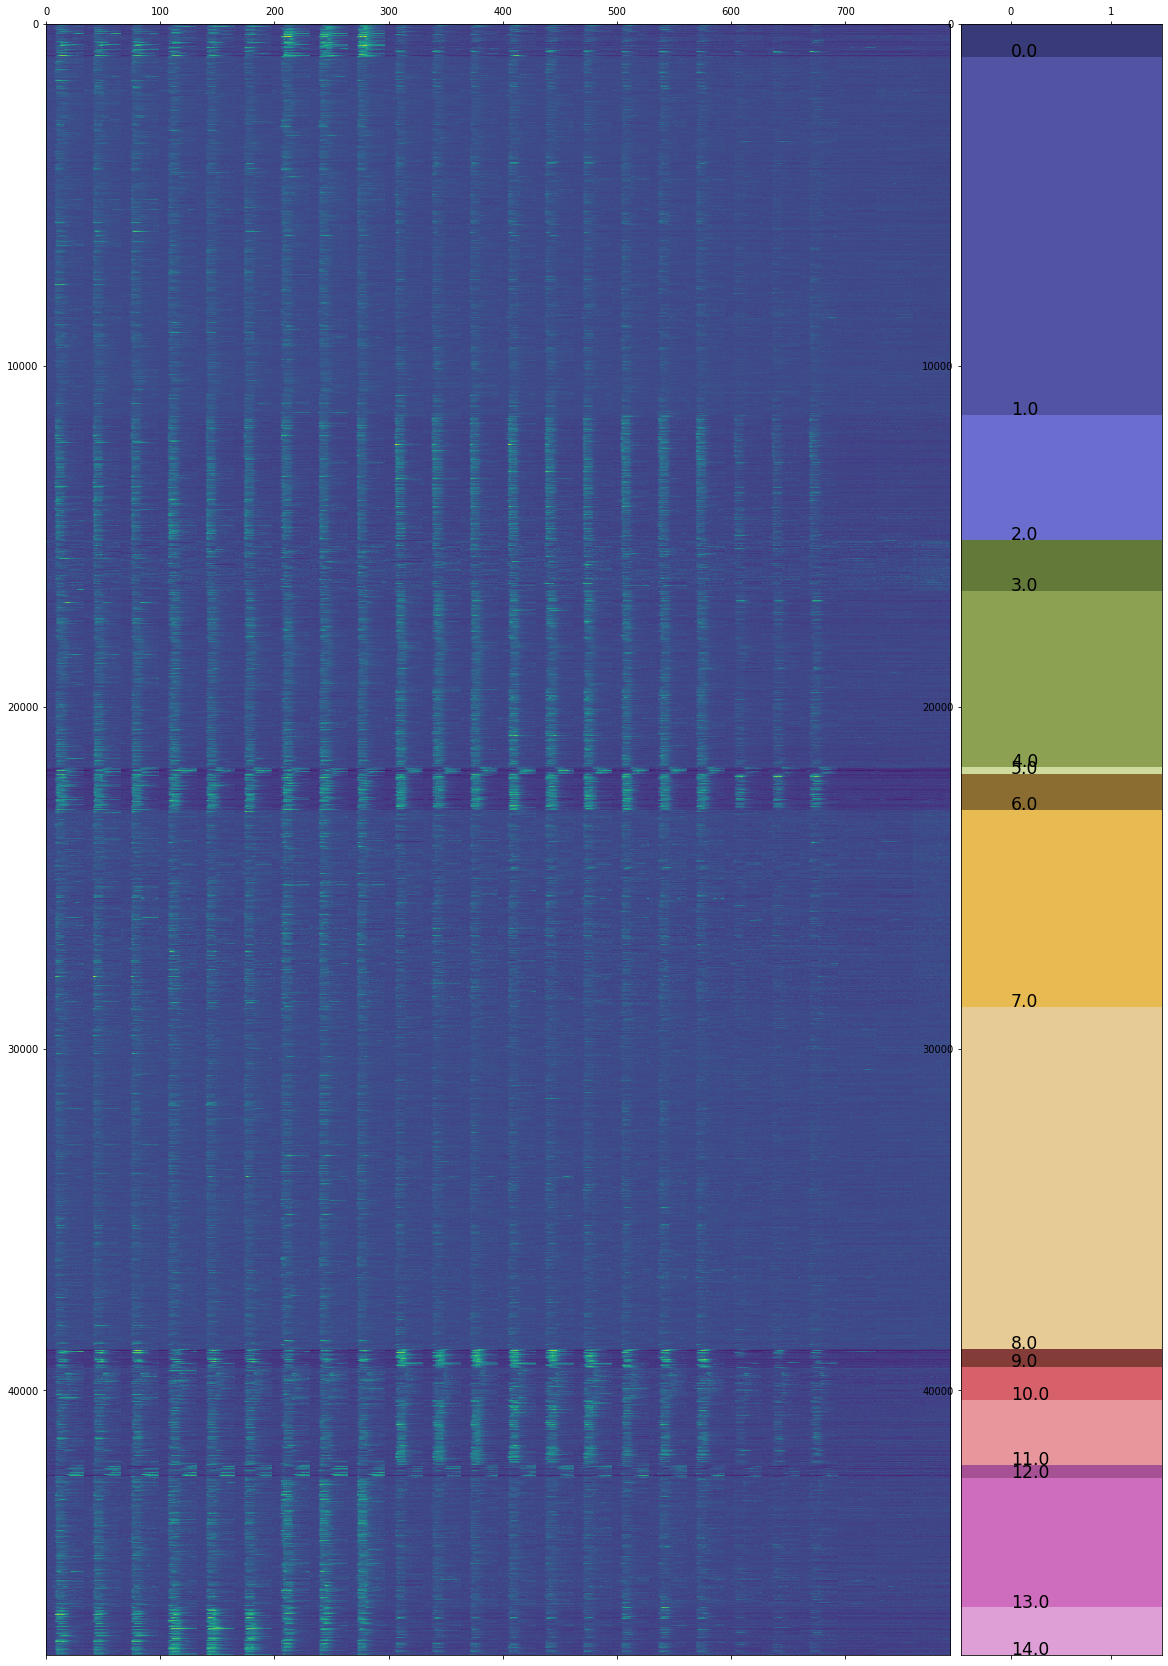

In [19]:
import catrace.cluster as catclust
importlib.reload(catclust)
catclust.plot_clustered_heatmap(all_pattern.transpose(), kmeans_dict[region])

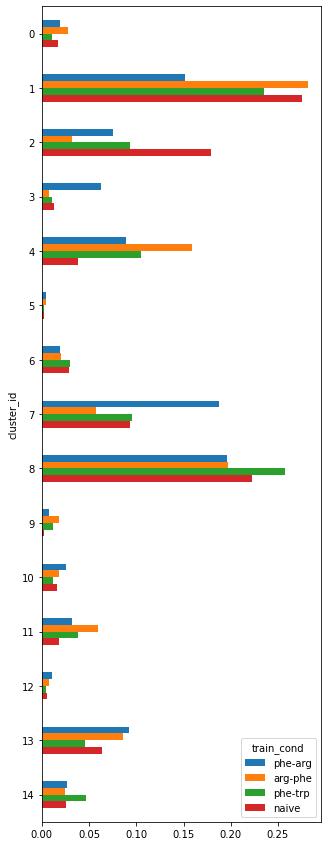

In [14]:
catclust.plot_cluster_count(all_pattern.transpose(), kmeans, exp_list)

In [12]:
region = 'OB'
all_pattern_dict = dict()
all_pattern_dict[region] = pd.read_pickle('../../results/JH_analysis/all_pattern_{}.pkl'.format(region))

In [16]:
n_components = 50
n_clusters = 15
kmeans_dict = dict()
nmf_model_dict = dict()
kmeans_dict[region], nmf_model_dict[region] = nmf_cluster(all_pattern, n_components, n_clusters)
import joblib
joblib.dump(kmeans_dict[region], '../../results/JH_analysis/nmf_kmeans_{}.joblib'.format(region))
joblib.dump(nmf_model_dict[region], '../../results/JH_analysis/nmf_model_{}.joblib'.format(region)) 

/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


['../../results/JH_analysis/nmf_model_OB.joblib']

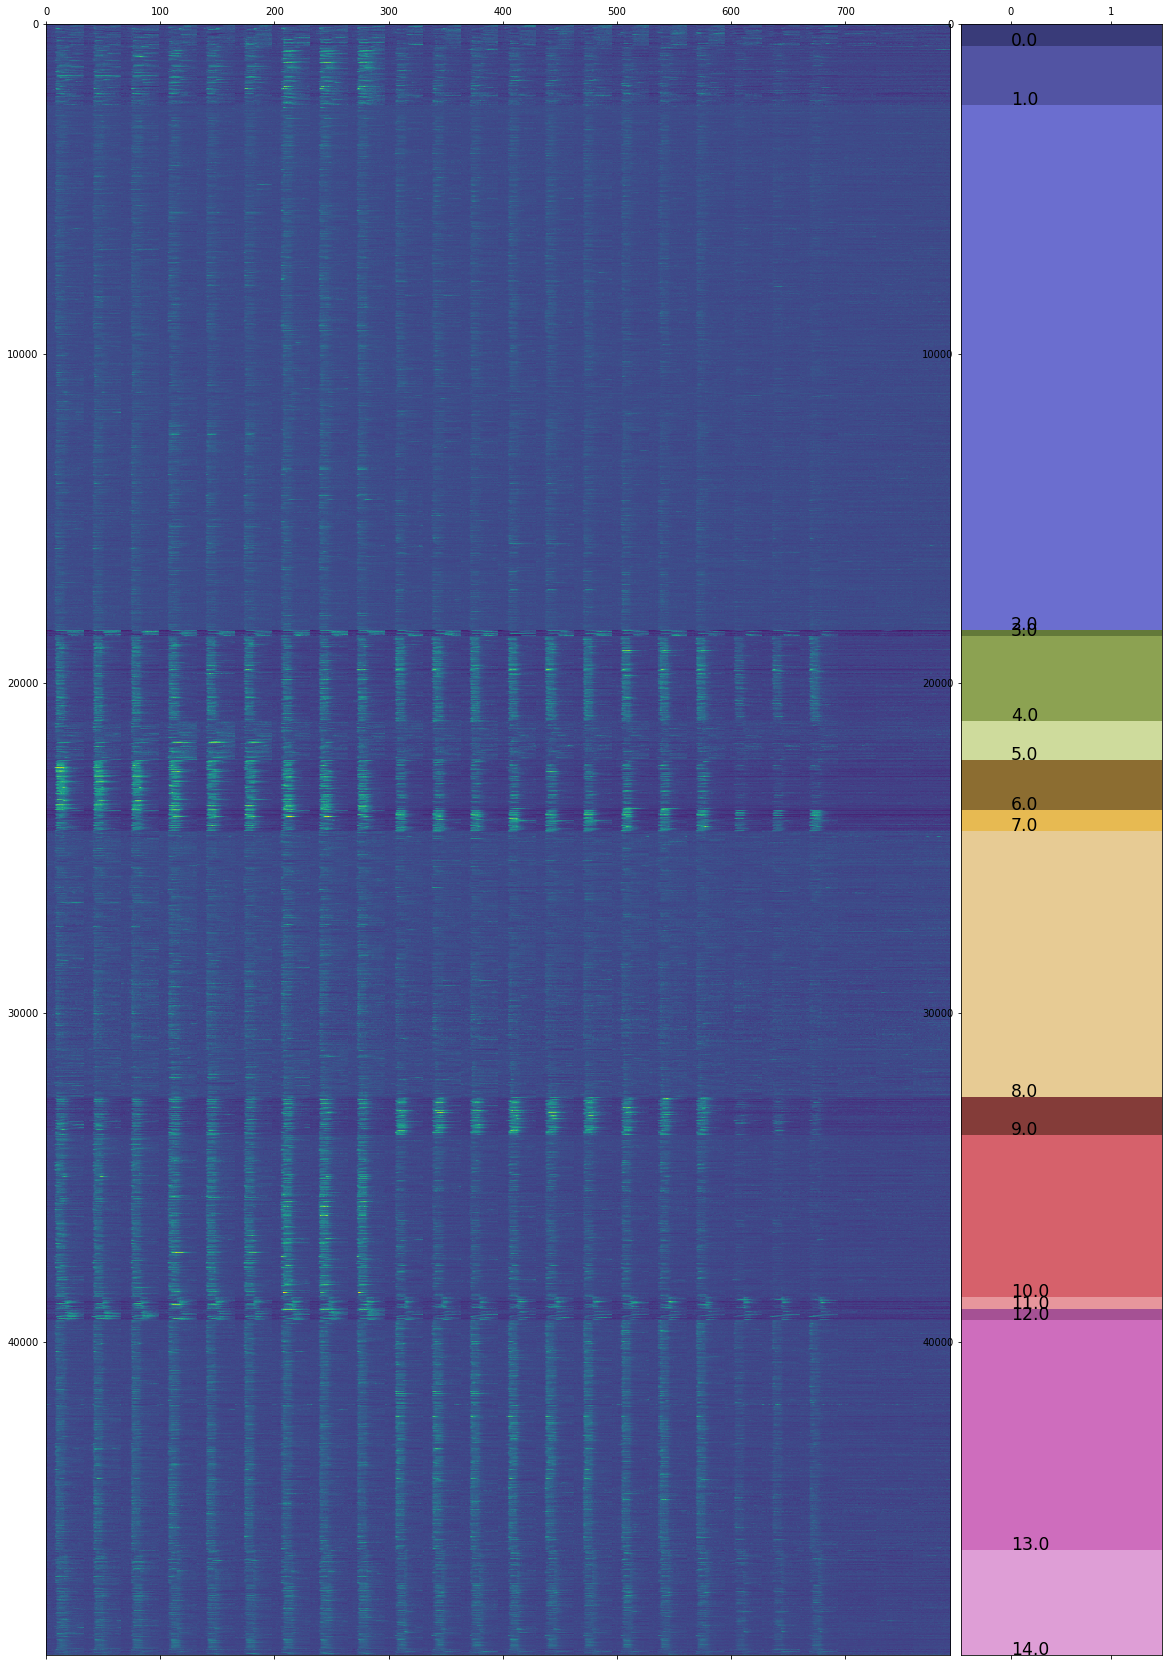

In [17]:
import catrace.cluster as catclust
catclust.plot_clustered_heatmap(all_pattern_dict[region].transpose(), kmeans_dict[region])

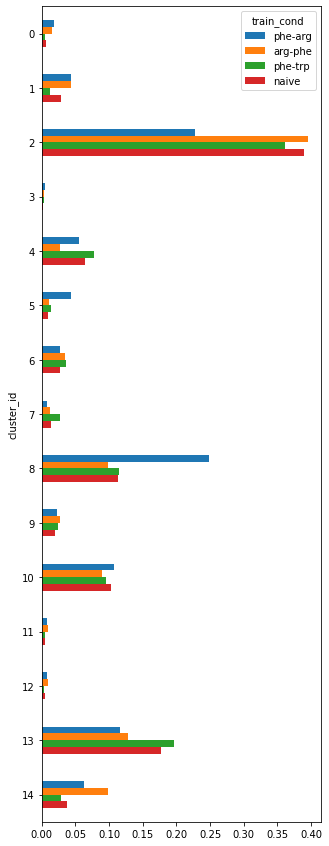

In [18]:
catclust.plot_cluster_count(all_pattern_dict[region].transpose(), kmeans_dict[region], exp_list)

In [23]:
H = nmf_model_dict[region].components_
print(all_pattern.shape)
H.shape

(49488, 792)


(50, 49488)